<a href="https://colab.research.google.com/github/sriramanved/evil_genius_assessment/blob/main/Evil_Geniuses_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# ALL MODULES
import pandas as pd 
import pickle
import numpy as np
from shapely.geometry import Polygon, Point

In [4]:
with open('/content/drive/MyDrive/Evil_Geniuses_Assessment/game_state_frame_data.pickle', 'rb') as pickle_file:
    data = pickle.load(pickle_file)

In [5]:
df = pd.DataFrame(data)  # Convert the list to a dataframe for better manipulation

# Display the first few rows of the DataFrame to get an idea of the structure
print(df.head())

# Display basic info about the DataFrame
print(df.info())


   round_num  tick side   team   hp  armor  is_alive     x     y    z  ...  \
0          1  2511    T  Team1  100    100      True -1310 -3333  294  ...   
1          1  2527    T  Team1  100    100      True -1303 -3322  294  ...   
2          1  2543    T  Team1  100    100      True -1290 -3303  292  ...   
3          1  2559    T  Team1  100    100      True -1275 -3280  290  ...   
4          1  2575    T  Team1  100    100      True -1254 -3262  288  ...   

  equipment_value_freezetime_end  area_name  seconds clock_time  t_alive  \
0                            900     TSpawn        0      01:55        5   
1                            900     TSpawn        0      01:55        5   
2                            900     TSpawn        0      01:55        5   
3                            900     TSpawn        0      01:55        5   
4                            900     TSpawn        1      01:55        5   

  ct_alive  bomb_planted     map_name  utility_used   player  
0        5 

In [8]:
df['inventory'].head()[0]


array([{'ammo_in_magazine': 20, 'ammo_in_reserve': 120, 'weapon_class': 'Pistols', 'weapon_name': 'Glock-18'},
       {'ammo_in_magazine': 1, 'ammo_in_reserve': 0, 'weapon_class': 'Grenade', 'weapon_name': 'Decoy Grenade'}],
      dtype=object)

In [19]:
df.head()

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player,weapon_classes
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,"[Pistols, Grenade]"
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,"[Pistols, Grenade]"
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,"[Pistols, Grenade]"
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0,"[Pistols, Grenade]"
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0,"[Pistols, Grenade]"


In [22]:
import ast

# Function to convert a string representation of a list to an actual list
def string_to_list(inventory_str):
    try:
        return ast.literal_eval(inventory_str)
    except ValueError:
        return []

class ProcessGameState:
    def __init__(self, df):
        self.df = df

    def filter_rows_within_boundary(self, z_min, z_max, boundary_coordinates):
        # Filtering rows based on Z-axis bounds
        df_filtered_z = self.df[(self.df['z'] >= z_min) & (self.df['z'] <= z_max)]

        # Convert coordinates into a polygon for efficient containment checking
        boundary_polygon = Polygon(boundary_coordinates)
        
        # Filtering rows based on X, Y boundary
        df_filtered_boundary = df_filtered_z[df_filtered_z.apply(lambda row: Point(row['x'], row['y']).within(boundary_polygon), axis=1)]
        
        return df_filtered_boundary

    def extract_weapon_classes(self):
        self.df['inventory'] = self.df['inventory'].apply(string_to_list)
        self.df['weapon_classes'] = self.df['inventory'].apply(lambda inventory: [item['weapon_class'] for item in inventory] if inventory is not None else [])


In [23]:
game_state = ProcessGameState(df)

In [24]:
# Define the light blue boundary coordinates
boundary_coordinates = [(-1735, 250), (-2024, 398), (-1565, 580)]

team2_t_boundary = game_state.filter_rows_within_boundary(z_min=285, z_max=421, boundary_coordinates=boundary_coordinates)
team2_t_boundary = team2_t_boundary[(team2_t_boundary['team'] == 'Team2') & (team2_t_boundary['side'] == 'T')]

# Print the number of entries
print(f'Number of entries for Team2 on T side within boundary: {len(team2_t_boundary)}')


Number of entries for Team2 on T side within boundary: 0


In [13]:
# Extract weapon classes first
game_state.extract_weapon_classes()


In [25]:
# Function to check if inventory has at least 2 rifles or SMGs
def has_two_rifles_or_smgs(weapon_classes):
    count = sum(1 for weapon_class in weapon_classes if weapon_class in ['Rifle', 'SMG'])
    return count >= 2

team2_t_bombsiteB = game_state.df[(game_state.df['team'] == 'Team2') & (game_state.df['side'] == 'T') & (game_state.df['area_name'] == 'BombsiteB')]
team2_t_bombsiteB['has_two_rifles_or_smgs'] = team2_t_bombsiteB['weapon_classes'].apply(has_two_rifles_or_smgs)

# Calculate average timer
average_timer = team2_t_bombsiteB[team2_t_bombsiteB['has_two_rifles_or_smgs']]['seconds'].mean()

print(f'Average timer for Team2 on T side entering BombsiteB with at least 2 rifles or SMGs: {average_timer}')


Average timer for Team2 on T side entering BombsiteB with at least 2 rifles or SMGs: nan


<ipython-input-25-5e78f5aab420>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team2_t_bombsiteB['has_two_rifles_or_smgs'] = team2_t_bombsiteB['weapon_classes'].apply(has_two_rifles_or_smgs)


In [26]:
print(f"Number of entries with at least 2 rifles or SMGs: {team2_t_bombsiteB['has_two_rifles_or_smgs'].sum()}")


Number of entries with at least 2 rifles or SMGs: 0


In [30]:
# Find instances with 2 or more rifles or SMGs in the entire dataset
has_two_rifles_or_smgs = game_state.df['weapon_classes'].apply(lambda x: sum(1 for weapon in x if weapon in ['Rifle', 'SMG']) >= 2)

# Check how many such instances exist
print(f"Number of entries with at least 2 rifles or SMGs: {has_two_rifles_or_smgs.sum()}")


Number of entries with at least 2 rifles or SMGs: 144


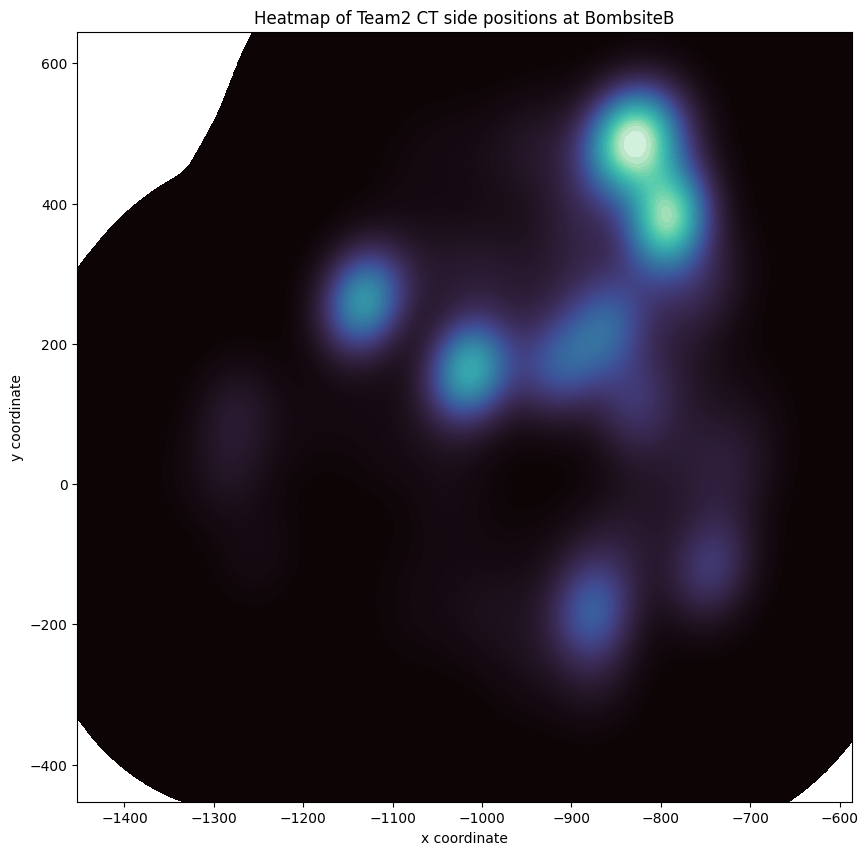

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only Team2 on the CT side at BombsiteB
team2_ct_bombsiteB = game_state.df[(game_state.df['team'] == 'Team2') & (game_state.df['side'] == 'CT') & (game_state.df['area_name'] == 'BombsiteB')]

# Plot the heatmap using seaborn
plt.figure(figsize=(10,10))
sns.kdeplot(
    data=team2_ct_bombsiteB,
    x="x",
    y="y",
    fill=True,
    thresh=0,
    levels=100,
    cmap="mako",
)
plt.title('Heatmap of Team2 CT side positions at BombsiteB')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.show()


3. Propose a solution to your product manager that could allow our coaching staff to request or acquire the output themselves and takes less than 1 weeks worth of work to implement
One possible solution would be to create a simple web application using a framework such as Flask or Django, which would have a user-friendly interface allowing the coaching staff to select a game file, input the boundary coordinates, and choose the team and side they are interested in. The application could then use the ProcessGameState class to analyze the game data and display the results on the web page.

To make it more user-friendly, we could integrate a map on which the user could visually select the area of interest, instead of having to input the boundary coordinates manually. Additionally, the results could be presented in the form of interactive charts and maps, allowing the user to better understand the data.

Since we already have the analysis code ready, the main tasks would be to design the user interface and integrate the analysis code with the web application, which should be achievable in less than a week. The use of open source tools and libraries such as Flask, Pandas and Seaborn would allow us to keep the costs down and speed up the development process.